In [9]:

import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_size = 64
batch_size = 100
workers = 2
dataroot = []
dataset = []
# Create new dataset from images
for i in range(1,5):
    dataset.append(dset.ImageFolder(root=F"./Dog_images/Label{i}",
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])))

# Create labels for our dataset
# Labels are in i
for i in range(len(dataset)):
    for j in range(len(dataset[i])):
        dataset[i].samples[j] = (dataset[i].samples[j][0],i)
        
# Combine all the datasets
newdataset = torch.utils.data.ConcatDataset(dataset)
    



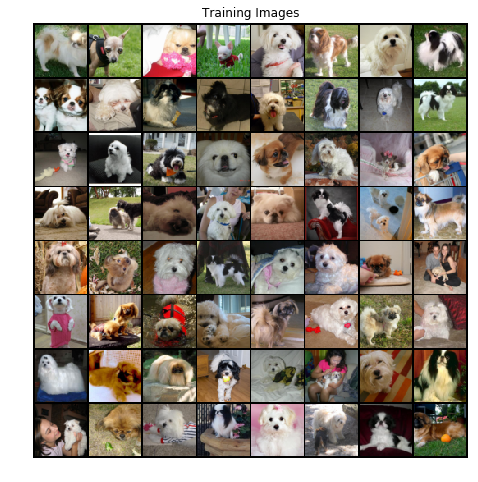

In [11]:
dataloader = torch.utils.data.DataLoader(newdataset, batch_size=batch_size,
                                        shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch,labels = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [145]:
print(labels)

tensor([2, 3, 3, 1, 1, 3, 3, 3, 2, 2, 3, 3, 2, 0, 3, 1, 3, 2, 2, 2, 3, 1, 3, 2,
        2, 3, 0, 2, 1, 2, 3, 2, 3, 2, 2, 1, 2, 3, 0, 3, 2, 1, 2, 1, 2, 2, 3, 2,
        2, 2, 1, 2, 3, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 3, 0, 2,
        2, 3, 2, 1, 3, 3, 1, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 1, 2, 3,
        3, 3, 2, 2])
